<h1><center>Machine Learning, Lecture 4<br><font color='blue'>  Polynomial Linear Regression </font><br><font color='green'>Logistic Regression</font><br><font color='gold'>Wine Recommandation</font><center><font color='purple'>Regularization</font><br><font color='green'>Multi-class Regression</font><center></h1>
  <h3><center>WHS Big Data Club</font><center></h3>
      <h4><center><i>Larry Huang, Jeffrey Huang</i></center></h4>



<h1><center><font color='red'>  ***PLEASE MAKE A COPY OF THIS DOCUMENT SO YOU CAN EDIT IT!*** <center></h1>

---



#<font color='purple'>Machine Learning Toolbox</font>



<table align="left" border="1">
  <tr>
    <th>Model Type</th>
    <th>Model Name</th> 
    <th>Examples</th>
    <th>Example Category</th>
  </tr>
  <tr>
    <td><b><center>Classification</center></b></td>
    <td>KNN</td> 
    <td>1. Iris Flower Type Classification<br>2. Stock Trading Strategy</td>
    <td>Science/Biology<br>Finance/Trading</td>
  </tr>
  <tr>
    <td><b>Classification<b></td>
    <td>Decision Tree</td> 
    <td>Breast Cancer Diagnosis</td>
            <td>HealthCare</b>
  </tr>
  <tr>
    <td><b>Classification<b></td>
    <td>Random Forest</td> 
    <td>Breast Cancer Diagnosis</td>
            <td>HealthCare</b>
  </tr>
  <tr>
    <td><font color='blue'><b>Classification<b></td>
    <td><font color='blue'><b>Logistic Regression</td> 
    <td><font color='blue'>Wine Recommendation</td>
            <td><font color='blue'>Business</b>
  </tr>
  <tr>
    <td><font color='blue'><b>Classification<b></td>
    <td><font color='blue'><b>Multinomial Regression</td> 
    <td><font color='blue'>Iris Flower Type Classification</td>
            <td><font color='blue'>Science/Biology</b>
  </tr>
  <tr>
    <td><b><center>Regression</center><b></td>
    <td>Linear Regression</td> 
    <td>Ames, IA House Price Prediction</td>
      <td>Business</b>
  </tr>
  <tr>
    <td><font color='blue'><b><center>Regression</center><b></td>
    <td><font color='blue'><b>Polynomial Regression</td> 
    <td></td>
      <td></b>
  </tr>
  <tr>
    <td><b><center>Regression</center><b></td>
    <td>KNN</td> 
    <td>Ames, IA House Price Prediction</td>
            <td>Business</b>
  </tr>
  <tr>
    <td><b><center>Regression</center><b></td>
    <td>Decision Tree</td> 
    <td></td>
            <td></b>
  </tr>
  <tr>
    <td><b><center>Regression</center><b></td>
    <td>Random Forest</td> 
    <td></td>
            <td></b>
  </tr>

</table>


# <font color='blue'>Polynomial Linear Regression</font>

## <font color='blue'>Polynomial Regression</font>

### Linear Regression with k features



$$y=b_0 + b_1x_1 + b_2x_2 + ... + b_kx_k$$

###<font color='blue'> Polynomial Regression</font>

#### Polynomial Regression with only one feature ($x$), and degree = k



$$y=b_0 + b_1x + b_2x^2 + ... + b_kx^k$$

#### <font color='blue'>Polynomial Regression with two features ($x_1$ and $x_2$), degree = 1

$$y=b_0 + b_1x_1 + b_2x_2 $$

#### <font color='blue'>Polynomial Regression with two features ($x_1$ and $x_2$), degree = 2


$$y=b_0 + b_1x_1 + b_2x_2 + b_3x_1^2 + b_4x_1x_2 + b_5x_2^2$$

#### <font color='blue'>Polynomial Regression with two features ($x_1$, and $x_2$), degree = 3

$$y=b_0 + b_1x_1 + b_2x_2 + b_3x_1^2 + b_4x_1x_2 + b_5x_2^2 +b_6x_1^3 + b_7x_1^2x_2 + b_8x_1x_2^2 + b_9x_2^3$$

####<b>Polynomial Regression is a kind of Linear Regression

### <font color='blue'>Polynomial Regression Model</font> learning from simulated Example

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')
plt.style.context('seaborn-white')

import seaborn as sns; 

import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We will generate simulated data based on:
<br>
   polynomial equation: $y = (x-5)^3  (x+6)^2$
<br>

We will then use Polynomial Regression Model to "learn" the coefficients and the intercept from simulated data.


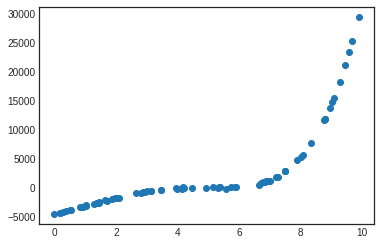

In [2]:
# Generate simulated data
rng = np.random.RandomState(1)

x = 10 * rng.rand(80)

y = (x-5)**3*(x+6)**2 + 80*rng.randn(80)

plt.scatter(x, y);

The above data does not look like linear.  We could easily verify using linear regression model.

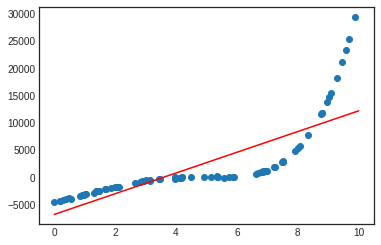

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, None])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='r');

The data looks like polynomial.  The reason that some data does not fall on the curve might be due to noise.
<br><br>Let's try polynomial model.

Linear Regression Model coefficient
[    0.         -2217.78553772   428.34332455]
Linear Regression Model intercept=-659.5


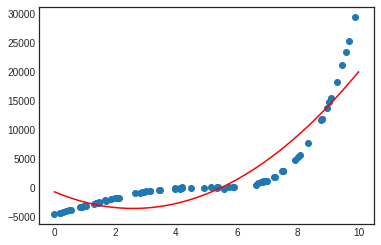

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree = 2)
X_poly = poly_feat.fit_transform(x[:, None])
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

print("Linear Regression Model coefficient")
print(poly_model.coef_)
print("Linear Regression Model intercept=%.1f" %poly_model.intercept_)

xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(poly_feat.fit_transform(xfit[:, None]))

plt.scatter(x, y)
plt.plot(xfit, yfit, color='r');

Linear Regression Model coefficient
[    0.          5825.19888908 -1646.44979179   141.181746  ]
Linear Regression Model intercept=-6841.8


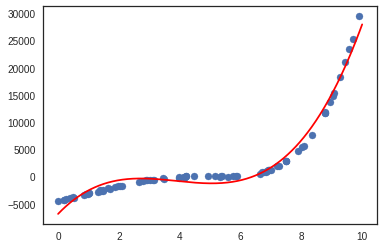

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_feat2 = PolynomialFeatures(degree = 3)
X_poly2 = poly_feat2.fit_transform(x[:, None])
poly_model2 = LinearRegression()
poly_model2.fit(X_poly2, y)

print("Linear Regression Model coefficient")
print(poly_model2.coef_)
print("Linear Regression Model intercept=%.1f" %poly_model2.intercept_)

xfit = np.linspace(0, 10, 1000)
yfit2 = poly_model2.predict(poly_feat2.fit_transform(xfit[:, None]))

plt.scatter(x, y)
plt.plot(xfit, yfit2, color='r');

Linear Regression Model coefficient
[ 0.00000000e+00  1.17222532e+03  2.55865412e+02 -7.30859344e+01
 -2.75400179e+00  9.98791560e-01]
Linear Regression Model intercept=-4498.7


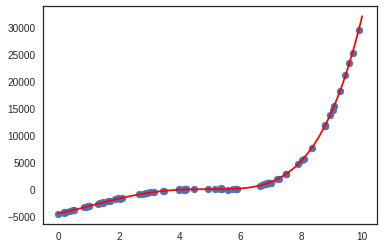

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_feat3 = PolynomialFeatures(degree = 5)
X_poly3 = poly_feat3.fit_transform(x[:, None])
poly_model3 = LinearRegression()
poly_model3.fit(X_poly3, y)

print("Linear Regression Model coefficient")
print(poly_model3.coef_)
print("Linear Regression Model intercept=%.1f" %poly_model3.intercept_)

xfit = np.linspace(0, 10, 1000)
yfit3 = poly_model3.predict(poly_feat3.fit_transform(xfit[:, None]))

plt.scatter(x, y)
plt.plot(xfit, yfit3, color='r');

### Based on the code above, it's easy to see that Polynomial Regression is Linear Regression

### What did PolynomialFeatures do?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree = 2)

X = np.array([[1], [2]])
Z = poly_feat.fit_transform(X)
print(X)
print(Z)


[[1]
 [2]]
[[1. 1. 1.]
 [1. 2. 4.]]


For $y = b_0 + b_1x^1 + b_2x^2$, PolynomialFeatures converts $x^1$ to $z_1$ and $x^2$ to $z_2$.  Hence the original model becomes a linear model: $y = b_0 + b_1z_1 + b_2z_2$
<br><br>Similarly, we have:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree = 2)

X = np.array([[1, 2], [3, 4]])
Z = poly_feat.fit_transform(X)
print(X)
print(Z)


[[1 2]
 [3 4]]
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]]


# <font color='green'>Logistic Regression</font>

For Linear Regression models, we predict continuous numerical value from features of continuous numerical values.
<br><br>
How about we need to predict binary value?  For example, the target variable only has two values, recommend or not recommend (or spam email or normal email).  Linear regression might not work for this case.
<br><br>
![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

### <font color='green'>One way to think about it is to "squeeze" target variable into a probability interval: [0, 1]</font>

For linear regression, we estimate the target varialbe using $\theta(x) = b_0+b_1x_1+b_2x_2$. 
Since the target variable has only two values, 0 or 1, we could use a function, $g(x)$, that will "squeeze" $\theta(x)$ into range [0, 1].  That is, $0<=g(\theta(x)) <= 1$ .
<br><br>We could think of $g(\theta(x))$ as **the probability of target variable have a value of 1, p**.
<br><br>So Logistic Regression is a probability machine learning method.
<br><br>
Which function do we choose as $g(x)$?  Historically people choose **Sigmoid function**, $g(x) = \frac{1}{1+e^{-x}}$.
<br><br>Hence $$p = g(\theta(x))=\frac{1}{1+e^{-\theta(x)}}=\frac{1}{1+e^{-(b_0+b_1x_1+b_2x_2)}}$$
<br><br>
If $g(\theta(x)) >=0.5$, we predict $y$ to be 1.  If $g(\theta(x)) <0.5$, we predict $y$ to be 0.
<br><br>
![alt text](https://i0.wp.com/www.stokastik.in/wp-content/uploads/2017/07/sigmoid.png?resize=400%2C300)
![alt text](https://www.saedsayad.com/images/LogReg_1.png)

#### <font color='green'>Another way to look at probably p above</font>

$p = g(\theta(x))=\frac{1}{1+e^{-\theta(x)}}$, hence $$e^{-\theta(x)}=\frac{1}{p}-1=\frac{1-p}{p}$$ Hence $$\theta(x) = -ln(\frac{1-p}{p})=ln(\frac{p}{1-p})$$
Hence Hence $$\hat{y} =\theta(x) = -ln(\frac{1-p}{p})=ln(\frac{p}{1-p})$$
Hence $$\hat{y} = ln(\frac{p}{1-p})$$

##### <font color='green'>Odds, Log of Odds, Logit Function</font>

In statistics, **Odds** of a particular event, means the ratio between the number of favorable outcomes to the number of unfavorable outcomes.  So Odds is the ratio of the probability of the event happening, p, over the probability of the event not happening, 1-p.
<br><br>
$odds = \frac{p}{1-p}$

**Logit** function (l**og of odds**) has very nice property.
<br><br>
$y = ln(\frac{p}{1-p})$
<br><br>
![alt text](https://qph.fs.quoracdn.net/main-qimg-388551810e0ecb283a9a150052b29029.webp)

So the original $y$ is the **logit** function of the "artificial" probability $p$, and the probability $p$ is the **Sigmoid function** of the original $y$:
<br><br>
$p = \frac{1}{1+e^{-y}}$


$ln(\frac{p}{1-p}) = y = b_0 + b_1x_1$

Logistic Regression is to find the best fitting sigmoid curve that fits the binary target value. 

Sigmoid Function Output :: [7.582560422162385e-10, 2.0611536181902037e-09, 5.602796406145941e-09, 1.522997951276035e-08, 4.1399375473943306e-08, 1.12535162055095e-07, 3.059022269256247e-07, 8.315280276641321e-07, 2.2603242979035746e-06, 6.144174602214718e-06, 1.670142184809518e-05, 4.5397868702434395e-05, 0.00012339457598623172, 0.0003353501304664781, 0.0009110511944006454, 0.0024726231566347743, 0.0066928509242848554, 0.01798620996209156, 0.04742587317756678, 0.11920292202211755, 0.2689414213699951, 0.5, 0.7310585786300049, 0.8807970779778823, 0.9525741268224334, 0.9820137900379085, 0.9933071490757153, 0.9975273768433653, 0.9990889488055994, 0.9996646498695336, 0.9998766054240137, 0.9999546021312976, 0.999983298578152, 0.9999938558253978, 0.999997739675702, 0.9999991684719722, 0.999999694097773, 0.9999998874648379, 0.9999999586006244, 0.9999999847700205, 0.9999999943972036, 0.9999999979388463]


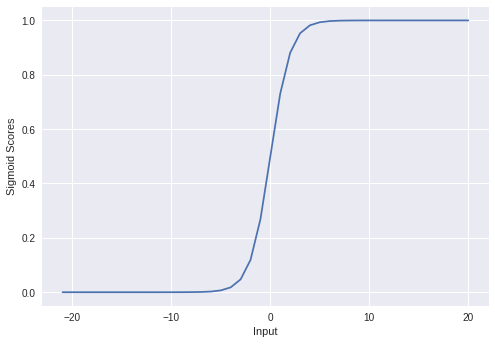

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
def sigmoid(inputs):
    sigmoid_scores = [1 / float(1 + np.exp(- x)) for x in inputs]
    return sigmoid_scores
 
 
sigmoid_inputs = range(-21, 21)
print("Sigmoid Function Output :: {}".format(sigmoid(sigmoid_inputs)))

plt.plot(sigmoid_inputs, sigmoid(sigmoid_inputs))
plt.xlabel("Input")
plt.ylabel("Sigmoid Scores")
plt.show()

### <font color='green'>Decision Boundary</font>

Our prediction rule is: If $g(\theta(x)) >=0.5$, we predict $y$ to be 1.  If $g(\theta(x)) <0.5$, we predict $y$ to be 0.
<br><br>
Looking at the graph above, $g(x)>=0.5$ is equivalent to $x>=0$.  Hence $g(\theta(x)) >=0.5$ is equivalent to $\theta(x)>=0$, and equivalent to $b_0+b_1x_1+b_2x_2>=0$
<br><br>$\theta(x)=b_0+b_1x_1+b_2x_2$ is a line on 2D plane.  $b_0+b_1x_1+b_2x_2>=0$ is the region that is above the line.  Hence the goal is to find a line on 2D plane that will separate the data points well such that the data points above the line are predicted to be 1 and the data points below the line are predicted to be 0.
<br><br>![alt text](http://www.holehouse.org/mlclass/06_Logistic_Regression_files/Image%20[5].png)
<br><br>This explains why the decision boundary is linear while logistic regression itself is NON linear.

### <font color='green'>Cost Function <font color='red'>(Not required)

A good cost function will equal 0 if the prediction is correct and will create a big value to penalize wrong prediction.
<br><br>
$$
Error(b_0, b_1,...) = \left\{
        \begin{array}{ll}
            -log(\hat{y}) & \quad y = 1 \\
            -log(1-\hat{y}) & \quad y=0
        \end{array}
    \right.
$$
<br><br>
By using this function we will grant the convexity to the function the gradient descent algorithm has to process. In case y=1, the output (i.e. the cost to pay) approaches to 0 as $\hat{y}$ approaches to 1. Conversely, the cost to pay grows to infinity as $\hat{y}$ approaches to 0.

We could write the one-line version of cost function:$$Error(b_0, b_1, ...) = −ylog(\hat{y})−(1−y)log(1−\hat{y})$$
Hence $$Error(b_0, b_1, ...) = −ylog(\frac{1}{1+e^{-(b_0+b_1x_1+b_2x_2)}})−(1−y)log(1−\frac{1}{1+e^{-(b_0+b_1x_1+b_2x_2)}})$$
Hence $$Cost(b_0, b_1, ...) = \sum_{i=1}^{n}[−ylog(\frac{1}{1+e^{-(b_0+b_1x_1+b_2x_2)}})−(1−y)log(1−\frac{1}{1+e^{-(b_0+b_1x_1+b_2x_2)}})]$$

Gradient descent is through the derivative of the cost function, similar to Linear Regression.

### <font color='green'>Pros and Cons of Logistic Regression</font>

Advantages of logistic regression:
1. Highly interpretable
2. Model training and prediction are fast.
3. No tuning is required 
4. Features don't need scaling.
5. Can perform well with a small number of observations.
6. Outputs well-calibrated predicted probabilities.

Disadvantages of logistic regression:
1. Presumes a linear relationship between the features and the log odds of the response.
2. Performance is (generally) not competitive with the best supervised learning methods.
3. Can't automatically learn feature interactions.

# <font color='gold'>Wine Recommandation

Wine quality dataset from UCI repositary: https://archive.ics.uci.edu/ml/datasets/wine+quality
<br><br>
Data Set Information:
<br><br>
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).   We only use Red Wine data here.
<br><br>
These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. 
<br><br>
Attribute Information:
<br>

Input variables (based on physicochemical tests): 
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol
<br><br>

Output variable (based on sensory data)
12. quality (score between 0 and 10) 


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')
plt.style.context('seaborn-white')

import seaborn as sns; 

import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
y = (data.quality > 5).astype(int) # would recommend this wine if its quality > 5
X = data.drop('quality', axis=1)
print(y.shape, X.shape) 
y.head()

(1599,) (1599, 11)


0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

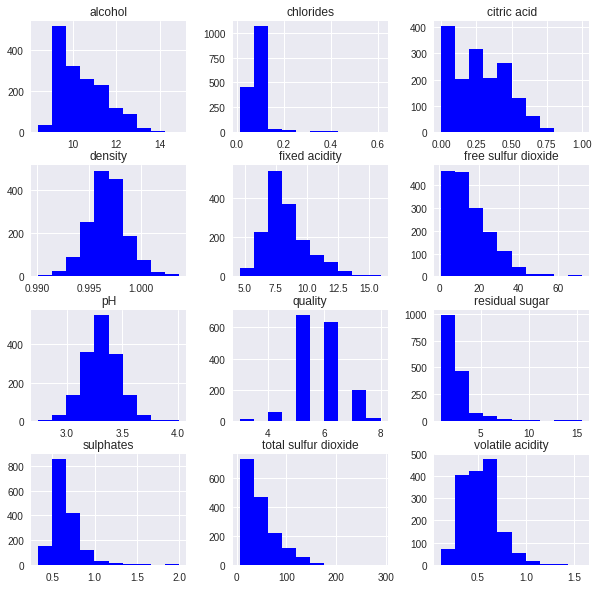

In [ ]:
sns.set()
data.hist(figsize=(10,10), color='blue')
plt.show()

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

y = (data.quality > 5).astype(int) # would recommend this wine if its quality > 5
X = data.drop('quality', axis=1)

from sklearn.model_selection import train_test_split
seed = 10 # set seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=seed)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.746875
[[105  38]
 [ 43 134]]


#### You could also do Multinomial Regression on this dataset to predict the quality of the wine.  Will leave this as an exercise for you in your spare time.

# <font color='purple'>Regularization</font>

Cost function  (residuals) $$ \sum_{i=1}^{n}(y_i-\hat{y})^2 = \sum_{i=1}^{n}(y_i-(\beta_0+\sum_{j=1}^{k}\beta_jx_{ij}))^2$$

Regularization tunes models such that model has significantly lower variance.  By adding regularization term to the cost function, it limits the value of $\beta_i$, hence reducing the variance of predicted value.  Since overfitting is the phenomena of a high variance error, regularization helps reduce overfitting.

Ridge Regularization (L2) $$\sum_{i=1}^{n}(y_i-\beta_0-\sum_{j=1}^{k}\beta_jx_{ij})^2 + \lambda\sum_{j=1}^{k}\beta_j^2$$

Lasso Regularization (L1) $$\sum_{i=1}^{n}(y_i-\beta_0-\sum_{j=1}^{k}\beta_jx_{ij})^2 + \lambda\sum_{j=1}^{k}|\beta_j|$$

LogisticRegression(penalty='l2'), penalty default is 'l2'.

# <font color='green'>Multi-Classification / Softmax

**Softmax function** calculates the probabilities distribution of the event over ‘n’ different events. The calculated probabilities will be helpful for determining the target class for the given inputs.
<br><br>
**Softmax function**:
<br><br>
$$F(y_i) = \frac{e^{y_i}}{\sum_{j=1}^{n}e^y_i}$$
<br><br>
The class that has the highest probability will be chosen as the predicted value.  The detail math is not required.  If you are interested in the math behind it and the history of its name, please visit [wikipedia link](https://en.wikipedia.org/wiki/Softmax_function).  Softmax classification is frequently used in Artificial Neural Network.
<br><br>
Properties:
1.   The calculated probabilities will be in the range of 0 to 1.
2.   The sum of all the probabilities is equals to 1.
3.   The high value will have the higher probability than other values.




Softmax Function Output :: [9.87929963e-19 2.68547207e-18 7.29986992e-18 1.98431037e-17
 5.39391483e-17 1.46621807e-16 3.98559393e-16 1.08339676e-15
 2.94497771e-15 8.00527940e-15 2.17606055e-14 5.91514586e-14
 1.60790335e-13 4.37073446e-13 1.18808881e-12 3.22956021e-12
 8.77885484e-12 2.38634016e-11 6.48674509e-11 1.76328013e-10
 4.79309234e-10 1.30289758e-09 3.54164282e-09 9.62718331e-09
 2.61693974e-08 7.11357975e-08 1.93367146e-07 5.25626399e-07
 1.42880069e-06 3.88388295e-06 1.05574884e-05 2.86982290e-05
 7.80098743e-05 2.12052824e-04 5.76419338e-04 1.56687021e-03
 4.25919482e-03 1.15776919e-02 3.14714295e-02 8.55482149e-02
 2.32544158e-01 6.32120559e-01]


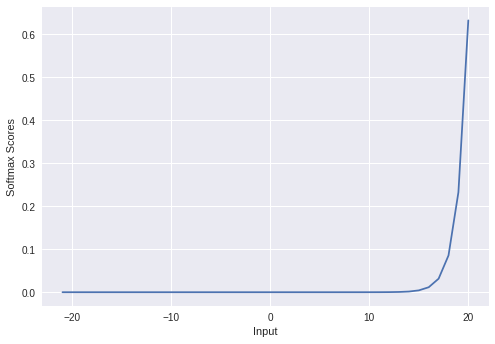

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
def softmax(inputs):
    return np.exp(inputs) / float(sum(np.exp(inputs)))
 
 
softmax_inputs = range(-21, 21)
print("Softmax Function Output :: {}".format(softmax(softmax_inputs)))

plt.plot(softmax_inputs, softmax(softmax_inputs))
plt.xlabel("Input")
plt.ylabel("Softmax Scores")
plt.show()

from sklearn.linear_model import LogisticRegression

LogisticRegression(multi_class='multinomial', ...)

# <font color='blue'>Visualization of Machine Learning Classifiers

In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [0, 3]]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

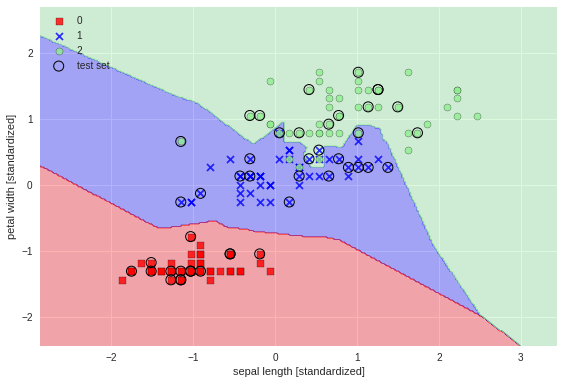

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

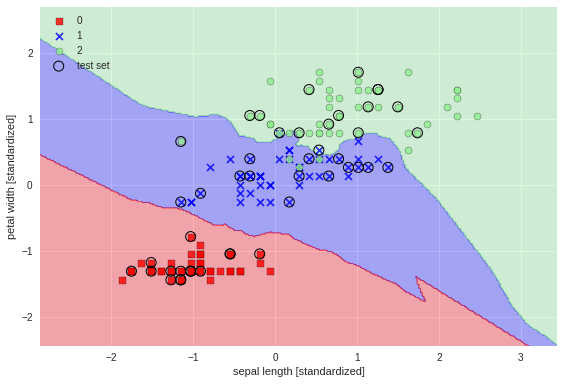

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

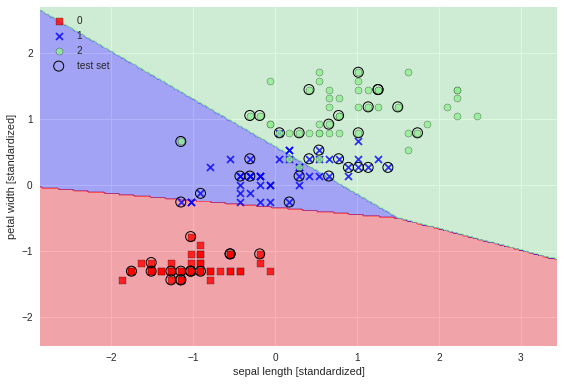

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

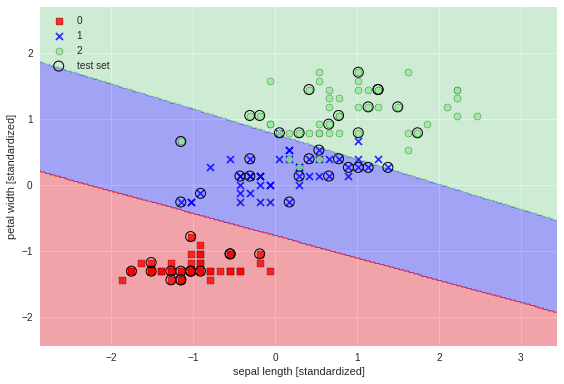

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

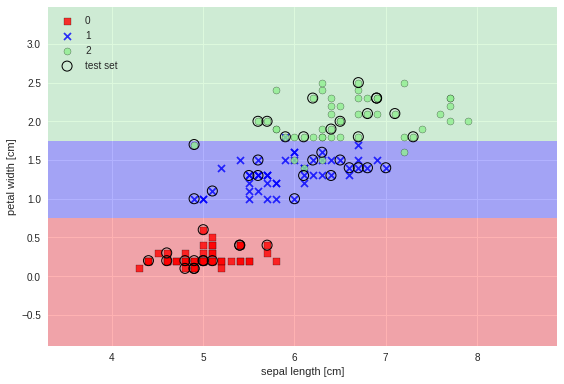

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=2, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

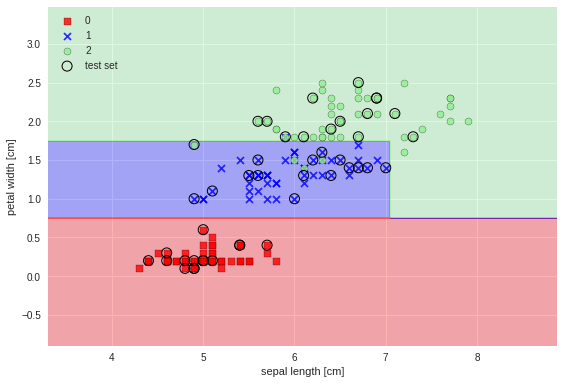

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

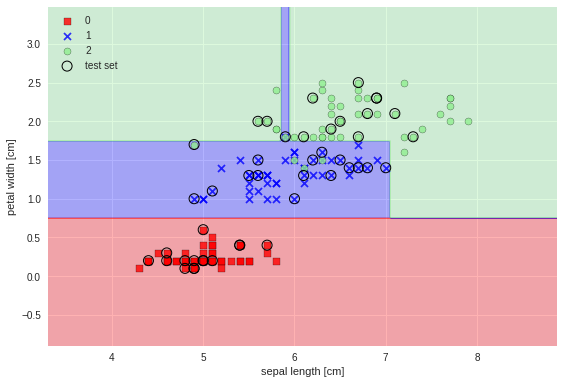

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

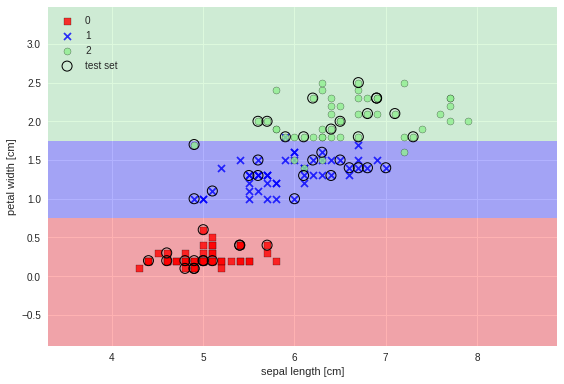

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

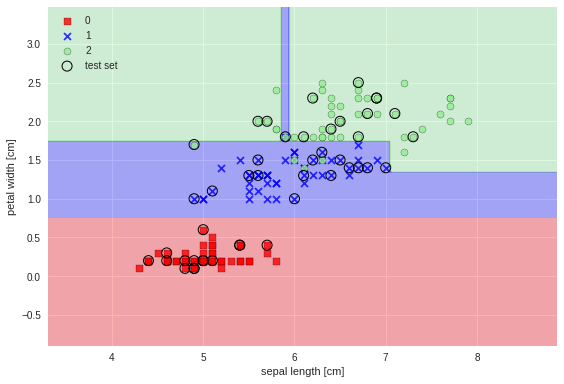

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

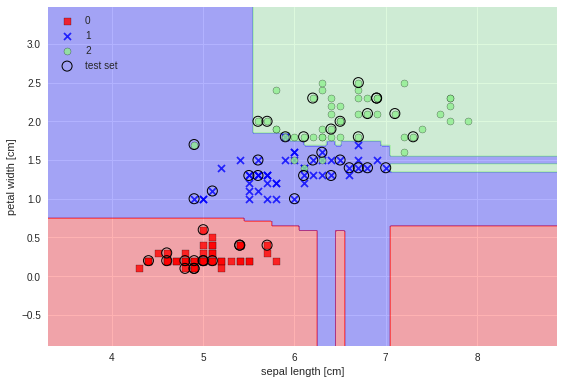

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

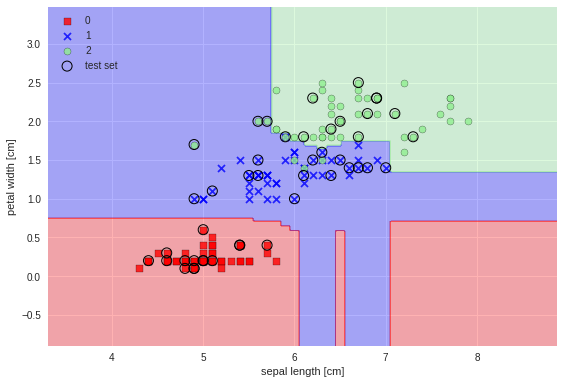

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=25, 
                                random_state=1)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()